# Technology Explorers
## Introduction Data Science

**Instructor**: Wesley Beckner

**Contact**: wesleybeckner@gmail.com

<br>

---

<br>

🎉 Today, we'll be working from this _digital_ notebook to complete exercises! If you don't have a computer, not to worry. Grab a notepad and pencil to write down your ideas and notes! 🎉

<br>

---

# Preparing Notebook for Demos

## Importing Packages

Once we have our packages installed, we need to import them. We can also import packages that are pre-installed in the Colab environment.

In [ ]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Importing Data

We also have the ability to import data, and use it elsewhere in the notebook 📝!

In [ ]:
# No Data Today! :)

## 🦉 Tenets of Machine Learning

We'll take the simple linear regression as an example and discuss some of the core tenets of ML: Bias-variance trade-off, irreducible error, and regularization.

### 📈 Bias-Variance Trade-Off

#### (Over and Underfitting)

The basic premise here is that theres some optimum number of parmeters to include in my model, if I include too few, my model will be too simple (***high bias***) and if I include too many it will be too complex and fit to noise (***high variance***)

<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_explorers/main/assets/machine_learning/ML5.png" width=1000px></img>

We can explore this phenomenon more easily, making up some data ourselves:

Text(0, 0.5, 'Y')

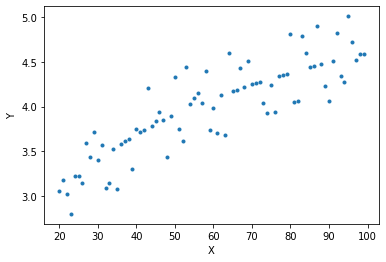

In [ ]:
# we can throttle the error rate
err = .5
random.seed(42)

# our data has a known underlying functional form (log(x))
def func(x, err):
  return np.log(x) + err * random.randint(-1,1) * random.random()
x = np.arange(20,100)
y = [func(t, err) for t in x]
plt.plot(x,y, ls='', marker='.')
plt.xlabel('X')
plt.ylabel('Y')

Now, let's pretend we've sampled from this ***population*** of data:

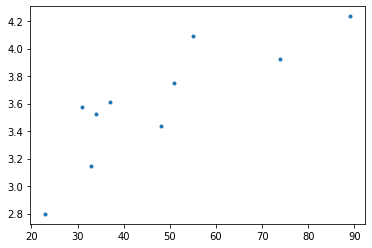

In [ ]:
random.seed(42)
X_train = random.sample(list(x), 10)

indices = [list(x).index(i) for i in X_train]
# we could also do it this way: np.argwhere([i in X_train for i in x])

y_train = [y[i] for i in indices]

plt.plot(X_train,y_train, ls='', marker='.')

Now let's take two extreme scenarios, fitting a linear line and a high order polynomial, to these datapoints. Keeping in mind the larger dataset, as well as the error we introduced in our data generating function, this will really illustrate our point!

Text(0.5, 1.0, 'High Variance Model')

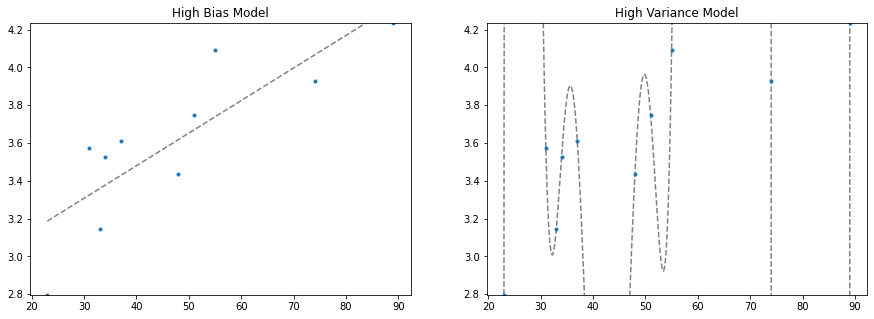

In [ ]:
# solving our training data with a n-degree polynomial
coefs = np.polyfit(X_train, y_train, 9)

# solve the slope and intercept of our 1-degree polynomial ;)
model = LinearRegression()
model.fit(np.array(X_train).reshape(-1,1), y_train)

# create some x data to plot our functions
X_seq = np.linspace(min(X_train),max(X_train),300).reshape(-1,1)

fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(X_seq, model.predict(X_seq), c='grey', ls='--')
ax[0].plot(X_train, y_train, ls='', marker='.')
ax[0].set_ylim(min(y_train), max(y_train))
ax[0].set_title("High Bias Model")


ax[1].plot(X_seq, np.polyval(coefs, X_seq), c='grey', ls='--')
ax[1].plot(X_train, y_train, ls='', marker='.')
ax[1].set_ylim(min(y_train), max(y_train))
ax[1].set_title("High Variance Model")

We've demonstrated two extreme cases. On the left, we limit our regression to only two parameters, a slope and a y-intercept. We say that this model has *high bias* because we are forcing the functional form without much consideration to the underlying data &mdash; we are saying this data is generated by a linear function, and no matter what data I train on, my final model will still be a straight line that more or less appears the same. Put another way, it has *low variance* with respect to the underlying data. 

On the right, we've allowed our model just as many polynomials it needs to perfectly fit the training data! We say this model has *low bias* because we don't introduce many constraints on the final form of the model. it is *high variance* because depending on the underlying training data, the final outcome of the model can change quite drastically!

In reality, the best model lies somewhere between these two cases. In the next few paragraphs we'll explore this concept further:

1. what happens when we retrain these models on different samples of the data population
  * and let's use this to better understand what we mean by *bias* and *variance*
2. what happens when we tie this back in with the error we introduced to the data generator?
  * and let's use this to better understand irreducible error

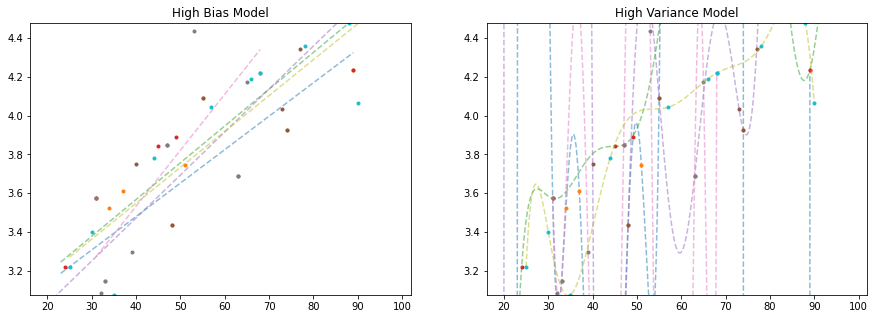

In [ ]:
random.seed(42)
fig, ax = plt.subplots(1,2,figsize=(15,5))
for samples in range(5):
  X_train = random.sample(list(x), 10)
  indices = [list(x).index(i) for i in X_train]
  y_train = [y[i] for i in indices]

  # solving our training data with a n-degree polynomial
  coefs = np.polyfit(X_train, y_train, 9)

  # solve the slope and intercept of our 1-degree polynomial ;)
  model = LinearRegression()
  model.fit(np.array(X_train).reshape(-1,1), y_train)

  # create some x data to plot our functions
  X_seq = np.linspace(min(X_train),max(X_train),300).reshape(-1,1)

  
  ax[0].plot(X_seq, model.predict(X_seq), alpha=0.5, ls='--')
  ax[0].plot(X_train, y_train, ls='', marker='.')
  ax[0].set_ylim(min(y_train), max(y_train))
  ax[0].set_title("High Bias Model")


  ax[1].plot(X_seq, np.polyval(coefs, X_seq), alpha=0.5, ls='--')
  ax[1].plot(X_train, y_train, ls='', marker='.')
  ax[1].set_ylim(min(y_train), max(y_train))
  ax[1].set_title("High Variance Model")

As we can see, depending on what data we train our model on, the *high bias* model changes relatively slightly, while the *high variance* model changes a whole awful lot!

The *high variance* model is prone to something we call *overfitting*. It fits the training data very well, but at the expense of creating a good, generalizable model that does well on unseen data. Let's take our last models, and plot them along the rest of the unseen data, what we'll call the *population*

Text(0.5, 1.0, 'High Variance Model')

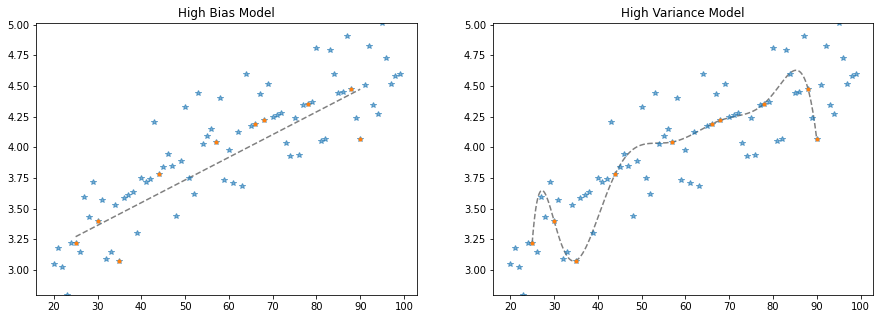

In [ ]:
# solving our training data with a n-degree polynomial
coefs = np.polyfit(X_train, y_train, 9)

# solve the slope and intercept of our 1-degree polynomial ;)
model = LinearRegression()
model.fit(np.array(X_train).reshape(-1,1), y_train)

# create some x data to plot our functions
X_seq = np.linspace(min(X_train),max(X_train),300).reshape(-1,1)

fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(X_seq, model.predict(X_seq), c='grey', ls='--')
ax[0].plot(x, y, ls='', marker='*', alpha=0.6)
ax[0].plot(X_train, y_train, ls='', marker='.')
ax[0].set_ylim(min(y), max(y))
ax[0].set_title("High Bias Model")


ax[1].plot(X_seq, np.polyval(coefs, X_seq), c='grey', ls='--')
ax[1].plot(x, y, ls='', marker='*', alpha=0.6)
ax[1].plot(X_train, y_train, ls='', marker='.')
ax[1].set_ylim(min(y), max(y))
ax[1].set_title("High Variance Model")

In particular, we see that the high variance model is doing very wacky things, demonstrating behaviors in the model where the underlying population data really gives no indication of such behavior. We say that these high variance model are particuarly prone to the phenomenon of *over fitting* and this is generally due to the fact that there is irreducible error in the underlying data. Let's demonstrate this.

### ❕ Irreducible Error

Irreducible error is ***always*** present in our data. It is a part of life, welcome to it. That being said, let's look what happens when we *pretend* there isn't any irreducible error in our population data

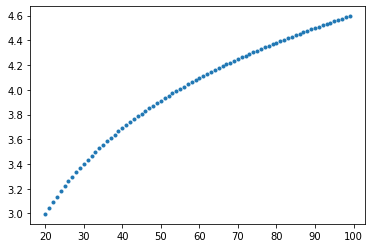

In [ ]:
x = np.arange(20,100)
y = [func(t, err=0) for t in x]
plt.plot(x,y, ls='', marker='.')

Text(0.5, 1.0, 'High Variance Model')

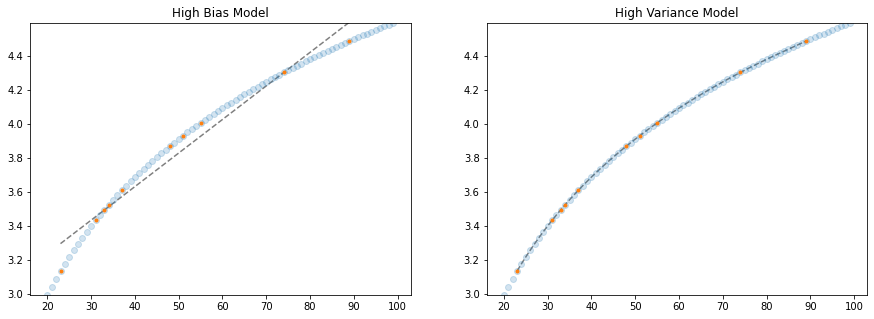

In [ ]:
random.seed(42)
X_train = random.sample(list(x), 10)

indices = [list(x).index(i) for i in X_train]
# we could also do it this way: np.argwhere([i in X_train for i in x])

y_train = [y[i] for i in indices]

# solving our training data with a n-degree polynomial
coefs = np.polyfit(X_train, y_train, 9)

# solve the slope and intercept of our 1-degree polynomial ;)
model = LinearRegression()
model.fit(np.array(X_train).reshape(-1,1), y_train)

# create some x data to plot our functions
X_seq = np.linspace(min(X_train),max(X_train),300).reshape(-1,1)

fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(X_seq, model.predict(X_seq), c='grey', ls='--')
ax[0].plot(x, y, ls='', marker='o', alpha=0.2)
ax[0].plot(X_train, y_train, ls='', marker='.')
ax[0].set_ylim(min(y), max(y))
ax[0].set_title("High Bias Model")


ax[1].plot(X_seq, np.polyval(coefs, X_seq), c='grey', ls='--')
ax[1].plot(x, y, ls='', marker='o', alpha=0.2)
ax[1].plot(X_train, y_train, ls='', marker='.')
ax[1].set_ylim(min(y), max(y))
ax[1].set_title("High Variance Model")

This time, our high variance model really *gets it*! And this is because the data we trained on actually *is* a good representation of the entire population. But this, in reality, almost never, ever happens. In the real world, we have irreducible error in our data samples, and we must account for this when choosing our model. 

I'm summary, we call this balance between error in our model functional form, and error from succumbing to irreducible error in our training data, the *bias variance tradeoff*

### 🕸️ Regularization

To talk about regularization, we're going to continue with our simple high bias model example, the much revered linear regression model. Linear regression takes on the form:

$$y(x)= m\cdot x + b$$ 

where $y$ is some target value and, $x$ is some feature; $m$ and $b$ are the slope and intercept, respectively.

To solve the problem, we need to find the values of $b$ and $m$ in equation 1 to best fit the data. 

In linear regression our goal is to minimize the error between computed values of positions $y^{\sf calc}(x_i)\equiv y^{\sf calc}_i$ and known values $y^{\sf exact}(x_i)\equiv y^{\sf exact}_i$, i.e. find $b$ and $m$ which lead to lowest value of

$$\epsilon (m,b) =SS_{\sf res}=\sum_{i=1}^{N}\left(y^{\sf exact}_i - y^{\sf calc}_i\right)^2 = \sum_{i=1}^{N}\left(y^{\sf exact}_i - m\cdot x_i - b \right)^2$$


**Now onto Regularization**

<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_explorers/main/assets/machine_learning/ML6.png" width=1000px></img>

There are many other regression algorithms, the two we want to highlight here are Ridge Regression and LASSO. They differ by an added term to the loss function. Let's review. The above equation expanded to multivariate form yields:

$$\sum_{i=1}^{N}(y_i - \sum_{j=1}^{P}x_{ij}\beta_{j})^2$$

for Ridge regression, we add a **_regularization_** term known as **_L2_** regularization:

$$\sum_{i=1}^{N}(y_i - \sum_{j=1}^{P}x_{ij}\beta_{j})^2 + \lambda \sum_{j=1}^{P}\beta_{j}^2$$

for **_LASSO_** (Least Absolute Shrinkage and Selection Operator) we add **_L1_** regularization:

$$\sum_{i=1}^{N}(y_i - \sum_{j=1}^{P}x_{ij}\beta_{j})^2 + \lambda \sum_{j=1}^{P}|\beta_{j}|$$

The difference between the two is that LASSO will allow coefficients to shrink to 0 while Ridge regression will not. **_Elastic Net_** is a combination of these two regularization methods. The key notion here is that ***regularization*** is a way of tempering our model, allowing it to pick for itself the most appropriate features. This crops up in many places other than simple linear regression in machine learning.

**Regularization appears in...**

***Ensemble learners*** (e.g. XGBoost and Random Forests) by combining the combinations of many weak algorithms 

***Neural networks*** with ***dropout*** and ***batch normalization***

Dropout is the Neural Network response to the wide success of ensemble learning. In a dropout layer, random neurons are dropped in each batch of training, i.e. their weighted updates are not sent to the next neural layer. Just as we learned with random forests, the end result is that the neural network can be thought of as many _independent models_ that _vote_ on the final output. 

Put another way, when a network does not contain dropout layers, and has a capacity that exceeds that which would be suited for the true, underlying complexity level of the data, it can begin to fit to noise. This ability to fit to noise is based on very specific relationships between neurons, which fire uniquely given the particular training example. Adding dropout _breaks_ these specific neural connections, and so the neural network as a whole is forced to find weights that apply generally, as there is no guarantee they will be _turned on_ when their specific training example they would usually overfit for comes around again. 

<p align=center>
<img src="https://i.imgur.com/a86utxY.gif"></img>
</p>
<small> Network with 50% dropout. Borrowed from Kaggle learn. </small>



## 📊 What is Data Science?

### The Emergence of Data Science

Data Science is a broad field, and depending on who you talk to, it can mean different things. In summary, many independent scientific fields began accumulating large amounts of data. At the UW in particular, these were dominated by the astronomy and oceanography departments. Folks began to realize that they needed a particular set of tools to handle large amounts of data. This culminated in the [eScience studio](https://escience.washington.edu/), which began to service the data needs of many departments on campus.

Today, data science not only has to do with large amounts of data, but refers generally to tools that allow us to work with a variety of data types. Because of this, machine learning is a tool within data science. But there are other tools apart from machine learning that makeup the data science ecosystem. Some of them are:

* data visualization
* databases 
* statistics

You could argue for others as well (algorithms, web servers, programming, etc.), but these are the formally accepted areas. 

#### 💭 7

We've talked a lot! Wow! Last topic. D A T A S C I E N C E. What is it? Any idea? Talk to your neighbor, convene together, then let's share. Do this at 2 different levels:

How would you explain data science to:
1. your grandmother
2. a student

#### 💬 7

I'll write these down, let's see if we can all agree on a precise definition

### Saying Stuff About Data (Statistics)

When we're talking about statistics, we're really talking about data story telling. Statistics is at the C O R E of data science, really. Without a basic knowledge of statistics it'll be hard for you to construct your data narratives and have them hold water. 

Let's start with some simple examples of data story telling, and use these to generate our own thoughts on the matter.

#### Anscombe's Quartet

There's a very famous anomaly in DS caled Anscombe's quartet. Observe the following data

<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_explorers/main/assets/data_science/ds1.png"></img>

We can construct this in python and confirm the summary statistics ourselves

In [ ]:
df = pd.read_excel("https://github.com/wesleybeckner/technology_explorers/blob"\
                   "/main/assets/data_science/anscombes.xlsx?raw=true",
              header=[0,1])
df

I         II       III         IV       
     X      Y   X     Y   X      Y   X      Y
0   10   8.04  10  9.14  10   7.46   8   6.58
1    8   6.95   8  8.14   8   6.77   8   5.76
2   13   7.58  13  8.74  13  12.74   8   7.71
3    9   8.81   9  8.77   9   7.11   8   8.84
4   11   8.33  11  9.26  11   7.81   8   8.47
5   14   9.96  14  8.10  14   8.84   8   7.04
6    6   7.24   6  6.13   6   6.08   8   5.25
7    4   4.26   4  3.10   4   5.39  19  12.50
8   12  10.84  12  9.13  12   8.15   8   5.56
9    7   4.82   7  7.26   7   6.42   8   7.91
10   5   5.68   5  4.74   5   5.73   8   6.89

We can calculate the mean/variance of X and Y for samples I, II, III, and IV

In [ ]:
df.mean()

I    X    9.000000
     Y    7.500909
II   X    9.000000
     Y    7.500909
III  X    9.000000
     Y    7.500000
IV   X    9.000000
     Y    7.500909
dtype: float64

In [ ]:
# do we remember the relationship between standard deviation and variance?
df.std()**2

I    X    11.000000
     Y     4.127269
II   X    11.000000
     Y     4.127629
III  X    11.000000
     Y     4.122620
IV   X    11.000000
     Y     4.123249
dtype: float64

We talked about the equation for a linear line last time:

$$y(x)= m\cdot x + b$$ 

In [ ]:
model = LinearRegression()
sets = ['I', 'II', 'III', 'IV']
for data in sets:
  model.fit(df[data]['X'].values.reshape(11,1),
            df[data]['Y'])
  print("Linear Regression Line: Y = {:.2f}X + {:.2f}".format(model.coef_[0], model.intercept_))

Linear Regression Line: Y = 0.50X + 3.00
Linear Regression Line: Y = 0.50X + 3.00
Linear Regression Line: Y = 0.50X + 3.00
Linear Regression Line: Y = 0.50X + 3.00


$R^2$ measures the goodness of fit. $R^2$ is generally defined as the ratio of the total sum of squares $SS_{\sf tot} $ to the residual sum of squares $SS_{\sf res} $:

We already talked about the residual sum of squares last session (what were we trying to do with this equation??)

$$SS_{\sf res}=\sum_{i=1}^{N} \left(y^{\sf exact}_i - y^{\sf calc}_i\right)^2$$

We now define the total sum of squares, a measure of the total variance in the data:

$$SS_{\sf tot}=\sum_{i=1}^{N} \left(y^{\sf exact}_i-\bar{y}\right)^2$$

The $R^2$ tells us how much of the variance of the data, is captured by the model we created:

$$R^2 = 1 - {SS_{\sf res}\over SS_{\sf tot}}$$

In the first equation, $\bar{y}=\sum_i y^{\sf exact}_i/N$ is the average value of y for $N$ points. The best value of $R^2$ is 1 but it can also take a negative value if the error is large.

In [ ]:
for data in sets:
  # calc the ssr
  ssr = np.sum((df[data]['Y'] - 
                model.predict(df[data]['X'].values.reshape(-1,1)))**2)

  # calc the sst
  sst = np.sum((df[data]['Y'] - 
                df[data]['Y'].mean())**2)

  # calc the r2
  r2 = 1 - (ssr/sst)
  print("R2 = {:.2f}".format(r2))

R2 = 0.67
R2 = 0.67
R2 = 0.67
R2 = 0.67


As we can see, everything checks out. The summary statistics are all the same!

Can we answer the following:

> What dataset is best described by the line of best fit?

We will revisit this question when we talk about data visualization

#### Taxonomy of Data Types

Another important topic in data science, is simply what kind of data we are working with. This will help us decide what kind of models to build, as well as how to visualize our data, and perhaps store it as well.

<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_explorers/main/assets/data_science/ds2.png"></img>

#### 💬 8

What are some examples of the different datatypes we can think of?

### Data Visualization

Data visualization, like it sounds, has to do with how we display and communicate information. At the end of the day, your findings and algorithms aren't worth very much if we can't share them with others.

#### Guiding Principles of Data Visualization

<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_explorers/main/assets/data_science/ds3.png"></img>

<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_explorers/main/assets/data_science/ds9.gif"></img>


<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_explorers/main/assets/data_science/ds7.png"></img>

wattenberg and Viegas visualization

In [ ]:
%%HTML
<video width="640" height="580" controls>
  <source src="https://github.com/wesleybeckner/technology_explorers/blob/main/assets/data_science/ds4.mp4?raw=true" type="video/mp4">
</video>

<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_explorers/main/assets/data_science/ds6.png"></img>

<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_explorers/main/assets/data_science/ds4.png"></img>

<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_explorers/main/assets/data_science/ds5.png"></img>


<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_explorers/main/assets/data_science/ds8.png"></img>


<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_explorers/main/assets/data_science/ds9.png"></img>

<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_explorers/main/assets/data_science/ds10.png"></img>


<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_explorers/main/assets/data_science/ds11.png"></img>

<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_explorers/main/assets/data_science/ds12.png"></img>

<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_explorers/main/assets/data_science/ds13.png"></img>

<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_explorers/main/assets/data_science/ds14.jpg"></img>

#### Visualization Un-Examples

**Unexample 1**

<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_explorers/main/assets/data_science/ds15.jpg"></img>

**Unexample 2**

<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_explorers/main/assets/data_science/ds19.png"></img>

**Unexample 3**

<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_explorers/main/assets/data_science/ds17.png"></img>

**Unexample 4**

<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_explorers/main/assets/data_science/ds18.png"></img>

#### 💭 8

Find an example of an interactive data visualization online. Here's one I [found](https://www.migrationpolicy.org/programs/data-hub/charts/us-immigrant-population-state-and-county) that I though was quite interesting!

#### 💬 8

Swap visualization links with your neighbor. What do you think could be improved about each one?

#### Back to Anscombe's Quartet

<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_explorers/main/assets/data_science/ds20.png"></img>

### Databases

Databases can be a seemingly dull sideshow of machine learning. But it is the foundation of any machine learning ever getting done. Without having our data in a neat and tidy place, we will be unable to train any algorithms. 

I offer one interesting tidbit about databases: 

Imagine Zhu Li and Meelo are depositing money in a shared bank account. In one version of the scheme, Zhu Li and Meelo can access their shared account, and make a deposit _at the same time_. The benefit to this is that the transaction happens fast, but on the downside, while they are both accessing the account, neither will see the action of the other. This can be quite alarming when it comes to money!

In a second version of the scheme, Zhu Li must wait for Meelo's transaction to update and vice versa before one or the other can make a deposity. The plus side is that both Zhu Li and Meelo will have complete knowledge of the exact value within the account at any point in time. The downside is that this can slow down the overall process.

This is a core consideration, among others, when designing databases!

#### 💭 9

Find an example of a place where you use databases in your day to day life

#### 💬 9

Did any of us come up with the same examples?